In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(current_dir)))
sys.path.append(parent_dir)
import streamProps
import math

class Format:
    end = '\033[0m'
    underline = '\033[4m'

In [3]:
print(Format.underline + "COLD STREAMS" + Format.end + "(from ASPEN HYSYS)")
cold1_In = streamProps.ThermoState("TQ", "REFPROP::HYDROGEN", 29.8847221682019, 0.994246061531329, 66663.9562974439/3600, "R17")
cold1_In.printState()
cold1_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 44.4763712604121, 7.79509*1e5, cold1_In.M, "R18")
cold1_Out.printState()

cold2_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 21.1017266469073, 1.250*1e5, 9263.10098893867/3600, "R09")
cold2_In.printState()
cold2_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 25.1714314744330, 1.24440000000000*1e5, cold2_In.M, "R10")
cold2_Out.printState()

print(Format.underline + "HOT STREAMS" + Format.end + "(from ASPEN HYSYS)")
mainH2_In = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 46.000, 18.8509033*1e5, 20833.3333333333/3600, "F06")
mainH2_In.x_para = 0.1/(math.exp(-175/mainH2_In.T)+0.1) - 7.06*(10**-9)*(mainH2_In.T**3) \
                        + 3.42*(10**-6)*(mainH2_In.T**2) - 6.2*(10**-5)*mainH2_In.T - 0.00227
print("F06 p-H2 mole fraction: " + str(round(mainH2_In.x_para,3)))
mainH2_In.printState()
mainH2_Out = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 30.000, 18.8509033*1e5, mainH2_In.M, "F07")
mainH2_Out.printState()

hot_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 47.400, 29.43702*1e5, 9263.10098893867/3600, "R05a")
hot_In.printState()
hot_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 33.200, 29.41205*1e5, hot_In.M, "R06")
hot_Out.printState()

COLD STREAMS(from ASPEN HYSYS)
Stream R17
M [kg/s]    =  18.5178
P [bar]     =  7.895
T [Kelvin]  =  29.88
H [kJ/kg]   =  440.771
S [kJ/kg.K] =  15.13


Stream R18
M [kg/s]    =  18.5178
P [bar]     =  7.795
T [Kelvin]  =  44.48
H [kJ/kg]   =  667.673
S [kJ/kg.K] =  21.515


Stream R09
M [kg/s]    =  2.5731
P [bar]     =  1.25
T [Kelvin]  =  21.1
H [kJ/kg]   =  452.477
S [kJ/kg.K] =  21.433


Stream R10
M [kg/s]    =  2.5731
P [bar]     =  1.244
T [Kelvin]  =  25.17
H [kJ/kg]   =  500.433
S [kJ/kg.K] =  23.53


HOT STREAMS(from ASPEN HYSYS)
F06 p-H2 mole fraction: 0.819
Stream F06
M [kg/s]    =  5.787
P [bar]     =  18.851
T [Kelvin]  =  46.0
H [kJ/kg]   =  735.995
S [kJ/kg.K] =  20.687


Stream F07
M [kg/s]    =  5.787
P [bar]     =  18.851
T [Kelvin]  =  30.0
H [kJ/kg]   =  154.878
S [kJ/kg.K] =  5.036


Stream R05a
M [kg/s]    =  2.5731
P [bar]     =  29.437
T [Kelvin]  =  47.4
H [kJ/kg]   =  560.085
S [kJ/kg.K] =  14.651


Stream R06
M [kg/s]    =  2.5731
P [bar]     =  29.412
T [K

In [4]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return abs(x*(cold1_In.H-cold1_Out.H) + cold2_In.M*(cold2_In.H-cold2_Out.H) + hot_In.M*(hot_In.H-hot_Out.H))

res = minimize_scalar(objective_function)
massFlow1A = res.x

cold1A_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, massFlow1A, "R17A")
cold1A_In.printState()
cold1B_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, cold1_In.M-massFlow1A, "R17B")
cold1B_In.printState()

Stream R17A
M [kg/s]    =  3.6973
P [bar]     =  1.25
T [Kelvin]  =  21.1
H [kJ/kg]   =  452.477
S [kJ/kg.K] =  21.433


Stream R17B
M [kg/s]    =  14.8205
P [bar]     =  1.25
T [Kelvin]  =  21.1
H [kJ/kg]   =  452.477
S [kJ/kg.K] =  21.433




In [5]:
nParallelHx = 3

lengthPFHX = 4.7232
widthPFHX  = 1.5000
heightPFHX = 0.5931
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

print(Format.underline + "Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

lengthHXA     = 3.7385
widthHXA      = 1.5000
heightHXA     = 0.1316
volumeHXA     = lengthHXA*widthHXA*heightHXA

print(Format.underline + "HXA Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthHXA)
print("Width  [m]  = ", widthHXA)
print("Height [m]  = ", heightHXA)
print("Volume [m3] = ", round(volumeHXA,3))
print("\n")

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)
print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))
print("\n")

Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  4.7232
Width  [m]  =  1.5
Height [m]  =  0.5931
Volume [m3] =  4.202


HXA Geometry
(based on ASPEN EDR)
Length [m]  =  3.7385
Width  [m]  =  1.5
Height [m]  =  0.1316
Volume [m3] =  0.738


HXB Geometry
Length [m]  =  4.7232
Width  [m]  =  1.5
Height [m]  =  0.489
Volume [m3] =  3.464




Final HX-6 Geometry
Length [m]  =  8.0
Width  [m]  =  1.5
Height [m]  =  3.0
Volume [m3] =  36.0


HX-B Geometry
Length [m]  =  8.0
Width  [m]  =  1.5
Height [m]  =  2.939
Volume [m3] =  35.262

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          7.01e-01       0.00e+00          50             88       
       2          2.92e-01       0.00e+00          138            134      
       3          1.48e-05       0.00e+00          272             0       
Solved in 3 iterations, number of nodes 272. 
Maximum relative residual: 1.48e-05 
Maximum boundary residual: 0.00e+00


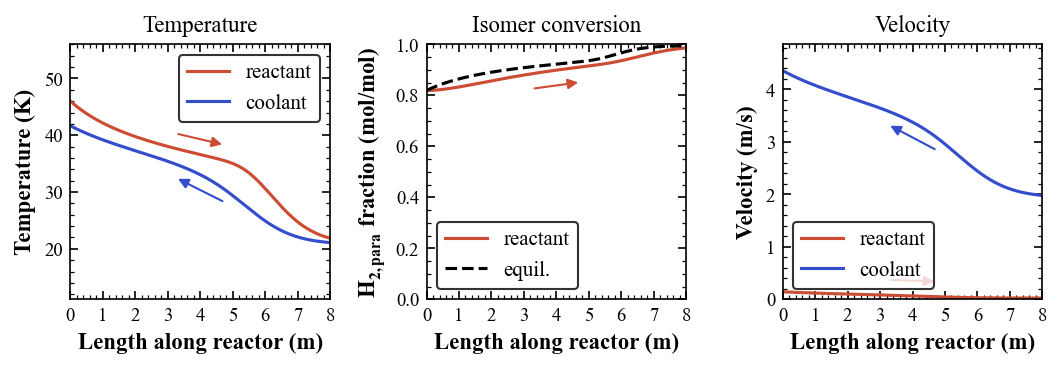

In [6]:
#Adjusted geometry
lengthPFHX = 8.000
widthPFHX  = 1.500
heightPFHX = 3.000
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4/nParallelHx, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold1B_In.M*86.4/nParallelHx,  # tonne-per-day
        'temperature':  cold1B_In.T,        # temperature of coolant at inlet (K)
        'pressure': cold1B_In.P/1000        # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,                # m
        'width': widthHXB,                 # m
        'height': heightHXB,                # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Final HX-6 Geometry" + Format.end)
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

In [7]:
xpara_final = 0.1/(math.exp(-175/mainH2_Out.T)+0.1) - 7.06*(10**-9)*(mainH2_Out.T**3) \
                + 3.42*(10**-6)*(mainH2_Out.T**2) - 6.2*(10**-5)*mainH2_Out.T - 0.00227

print(xpara_final)

0.970307481347243


In [8]:
print(results)

        Z (m)  Reactant pressure (kPa)  Coolant pressure (kPa)  \
0    0.000000              1885.090330              123.381545   
1    0.081633              1885.044850              123.405593   
2    0.163265              1885.000128              123.429458   
3    0.244898              1884.956136              123.453147   
4    0.326531              1884.912846              123.476666   
..        ...                      ...                     ...   
267  7.927438              1882.822521              124.992239   
268  7.945578              1882.820094              124.994182   
269  7.963719              1882.817667              124.996123   
270  7.981859              1882.815240              124.998062   
271  8.000000              1882.812814              125.000000   

     Reactant temperature (K)  Coolant temperature (K)  \
0                   46.000000                41.661355   
1                   45.595266                41.421294   
2                   45.210756    